In [1]:
import numpy as np 
import pandas as pd


# 1. 데이터 불러오기 및 정보 확인

In [2]:
train_data = pd.read_csv('./titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv('./titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.iloc[:,1:].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# 2. column별 데이터 자세한 확인 및 전처리

In [7]:
# 우선 null값들이 들어있는 column들 부터 확인
train_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# 쓸모없는 PassengerId 삭제
train_data.drop(columns='PassengerId',axis=1,inplace=True)

# Survived와 상관계수의 절대값이 가장 작았던 SibSp삭제
train_data.drop(columns='SibSp',axis=1,inplace=True)
train_data

,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,111369,30.0000,C148,C


In [9]:
# null값 개수가 애매한 'Age'를 어떻게 처리할지 결정하기 위하여
# 자세한 정보 확인

train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## 평균이나 중간값으로 null값을 대체하기에는 표준편차가 너무 크고
## 연속형 데이터라 최빈값은 의미가 없으나 버리기에는 너무 아까운 데이터라고
## 판단하여 이후 전처리에서 null인 행과 숫자가 들어가 있는 행을 구분하여
## 모델을 돌리기로 결정

In [10]:
# null값 개수가 적은 'Embarked'를 어떻게 처리할지 결정하기 위하여
# 요소 개수 확인
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 범주형 데이터이고 null 개수가 적어 최빈값으로 대체하기로 결정

In [11]:
# Embarked 최빈값('S')으로 대체
train_data['Embarked'].fillna('S',inplace=True)

# 이후 모델을 돌리기 위하여 Embarked 숫자로 변경 {'S': 0 ,'C': 1 , 'Q' : 2 } 
train_data['Embarked'].replace({'S': 0 ,'C': 1 , 'Q' : 2 },inplace=True)

# null값이 너무 많은 Cabin 제거
train_data.drop(columns='Cabin',axis=1,inplace=True)

# Sex 숫자로 변경 {'male':0,'female':1}
train_data['Sex'].replace({'male': 0 ,'female': 1 },inplace=True)

# 결과 확인
train_data

,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,0,A/5 21171,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,0,PC 17599,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,STON/O2. 3101282,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,0,113803,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,211536,13.0000,0
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,112053,30.0000,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,2,W./C. 6607,23.4500,0
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,111369,30.0000,1


In [12]:
# Name 컬럼의 중간의 호칭에 어떠한 연관이 있지 않을까 생각하여 호칭만 남기기
train_data['Name'] = train_data['Name'].apply(lambda x:x[x.find(',')+2:x.find('.')])

# 처리후 데이터 확인
print(train_data['Name'].value_counts())

# 각각 호칭별 살아남은 비율 확인
print(train_data.loc[(train_data['Survived']==1)]['Name'].value_counts()/train_data['Name'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64
Capt                 NaN
Col             0.500000
Don                  NaN
Dr              0.428571
Jonkheer             NaN
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev                  NaN
Sir             1.000000
the Countess    1.000000
Name: Name, dtype: float64


## 살아남은 비율을 보았을 때 Mr:15%, Mrs:79%,
## Miss:69%, Master:57%, Rev:0%, others:64%
## 호칭보다 성별차이와 지위에 따른 Pclass차이로
## 충분히 설명된다고 판단하여 삭제하기로 결정

In [13]:
#Name 컬럼 삭제
train_data.drop(columns='Name',axis=1,inplace=True)

# Ticket 은 Pclass와 관련있는 것 같지만 확실하지 않으므로 삭제
train_data.drop(columns='Ticket',axis=1,inplace=True)
train_data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,22.0,0,7.2500,0
1,1,1,1,38.0,0,71.2833,1
2,1,3,1,26.0,0,7.9250,0
3,1,1,1,35.0,0,53.1000,0
4,0,3,0,35.0,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,13.0000,0
887,1,1,1,19.0,0,30.0000,0
888,0,3,1,NaN,2,23.4500,0
889,1,1,0,26.0,0,30.0000,1


In [14]:
train_data.drop(columns='Parch',axis=1,inplace=True)

In [15]:
# # 범주형 데이터 처리

# train_data['Embarked'] = train_data['Embarked'].astype('category')
# Embarked_dummy = pd.get_dummies(train_data['Embarked'],prefix='Embarked',drop_first=True)
# train_data = pd.concat([train_data,Embarked_dummy],axis=1)

# train_data['Parch'] = train_data['Parch'].astype('category')
# Parch_dummy = pd.get_dummies(train_data['Parch'],prefix='Parch',drop_first=True)
# train_data = pd.concat([train_data,Parch_dummy],axis=1)

# train_data['Pclass'] = train_data['Pclass'].astype('category')
# Pclass_dummy = pd.get_dummies(train_data['Pclass'],prefix='Pclass',drop_first=True)
# train_data = pd.concat([train_data,Pclass_dummy],axis=1)

# train_data['Sex'] = train_data['Sex'].astype('category')
# Sex_dummy = pd.get_dummies(train_data['Sex'],prefix='Sex',drop_first=True)
# train_data['Sex'] = Sex_dummy

# train_data.drop(columns='Pclass',axis=1,inplace=True)
# train_data.drop(columns='Embarked',axis=1,inplace=True)
# train_data.drop(columns='Parch',axis=1,inplace=True)


## 직접 돌려보니 결과의 차이가 적고 오히려 나쁜 부분도 있어서 제거

In [16]:
# # 아웃레이어
# print(train_data[['Age','Fare']].describe())
# train_data=train_data.loc[(train_data['Age']<train_data['Age'].mean()+(3*train_data['Age'].std()))]
# train_data=train_data.loc[(train_data['Fare']<train_data['Fare'].mean()+(3*train_data['Fare'].std()))]
# train_data.reset_index(drop=True,inplace=True)

## 직접 돌려보니 결과의 차이가 적고 오히려 나쁜 부분도 있어서 제거

In [17]:
# Embarked의 생존비율을 확인
train_data.loc[(train_data['Survived']==1)]['Embarked'].value_counts()/\
train_data['Embarked'].value_counts()

0    0.339009
1    0.553571
2    0.389610
Name: Embarked, dtype: float64

## 이정도면 유효하다 판단하여 남기기로 결정

# 3. 특성들을 차트로 보기편하게 확인하기

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Survived와 Pclass의 관계 확인
f_s = train_data.loc[(train_data['Survived']==1)&(train_data['Pclass']==1)]['Pclass'].count()\
/train_data.loc[(train_data['Pclass']==1)]['Pclass'].count()
f_d = 1-f_s
f_d = round(f_d*100,2)
f_s = round(f_s*100,2)

s_s = train_data.loc[(train_data['Survived']==1)&(train_data['Pclass']==2)]['Pclass'].count()\
/train_data.loc[(train_data['Pclass']==2)]['Pclass'].count()
s_d = 1-s_s
s_d = round(s_d*100,2)
s_s = round(s_s*100,2)

t_s = train_data.loc[(train_data['Survived']==1)&(train_data['Pclass']==3)]['Pclass'].count()\
/train_data.loc[(train_data['Pclass']==3)]['Pclass'].count()
t_d = 1-t_s
t_d = round(t_d*100,2)
t_s = round(t_s*100,2)

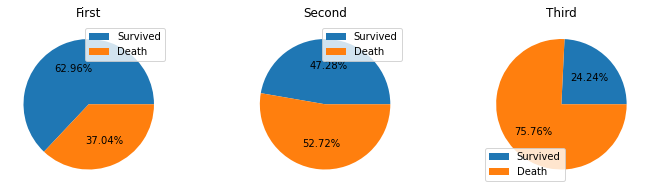

In [20]:
# 파이차트로 그려보기
f,ax = plt.subplots(1,3,figsize=(12,3))
ax[0].pie([f_s,f_d],autopct='%.2f%%')
ax[1].pie([s_s,s_d],autopct='%.2f%%')
ax[2].pie([t_s,t_d],autopct='%.2f%%')
for idx, i in enumerate(['First','Second','Third']):    
    ax[idx].set_title(i)
    ax[idx].legend(['Survived','Death'])
plt.show()

In [21]:
# Sex와 Survived의 관계 확인
ma_s = train_data.loc[(train_data['Survived']==1)&(train_data['Sex']==0)]['Sex'].count()\
/train_data.loc[(train_data['Sex']==0)]['Pclass'].count()
ma_d = 1-ma_s
ma_d = round(ma_d*100,2)
ma_s = round(ma_s*100,2)

fe_s = train_data.loc[(train_data['Survived']==1)&(train_data['Sex']==1)]['Sex'].count()\
/train_data.loc[(train_data['Sex']==1)]['Pclass'].count()
fe_d = 1-fe_s
fe_d = round(fe_d*100,2)
fe_s = round(fe_s*100,2)

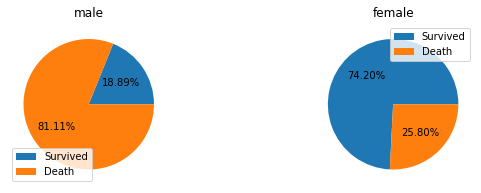

In [22]:
# 파이차트로 그려보기
f,ax = plt.subplots(1,2,figsize=(10,3))
ax[0].pie([ma_s,ma_d],autopct='%.2f%%')
ax[1].pie([fe_s,fe_d],autopct='%.2f%%')
for idx, i in enumerate(['male','female']):    
    ax[idx].set_title(i)
    ax[idx].legend(['Survived','Death'])
plt.show()

C:\Users\hongj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

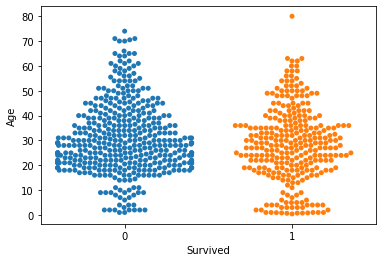

In [23]:
# Age와 Survived의 관계 차트로 확인
sns.swarmplot(x='Survived',y='Age',data=train_data)

## 큰 차이는 없어보이지만 어릴수록 좀더 많이 살아남은 경향이 있고
## 아이들의 경우 차이가 많다.

# 4. 스케일링

In [24]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler


In [25]:
ss=StandardScaler()

# Age가 null이 아닌 경우의 평균을 구하기 위하여 구분
ag=train_data.dropna(axis=0)['Age']

# Age의 평균으로 null값 치환
c=train_data.fillna(ag.mean())

# Fare와 Age column만 스케일링
e=c.loc[:,['Fare','Age']]
f=train_data.loc[:,['Fare','Age']]
ss.fit(e)

a = pd.DataFrame(ss.transform(f),columns=f.columns)
sc_train_data=train_data.copy()
sc_train_data['Fare']=a.loc[:,'Fare']
sc_train_data['Age']=a.loc[:,'Age']
sc_train_data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,-0.592481,-0.502445,0
1,1,1,1,0.638789,0.786845,1
2,1,3,1,-0.284663,-0.488854,0
3,1,1,1,0.407926,0.420730,0
4,0,3,0,0.407926,-0.486337,0
...,...,...,...,...,...,...
886,0,2,0,-0.207709,-0.386671,0
887,1,1,1,-0.823344,-0.044381,0
888,0,3,1,NaN,-0.176263,0
889,1,1,0,-0.284663,-0.044381,1


In [26]:
# Age 컬럼의 Null이 아닌 행 분리(X_A)
X_AN=sc_train_data.drop(columns='Age',axis=1)
X_A=sc_train_data.dropna(axis=0)

# Train에 들어가면 안되는 Survived column 삭제
X_AN.drop(columns='Survived',axis=1,inplace=True)
X_A.drop(columns='Survived',axis=1,inplace=True)

# 각각의 타겟 데이터 생성
y_AN=train_data.iloc[:,0]
y_A=train_data.dropna(axis=0).iloc[:,0]

# 알고리즘에 돌리기 위하여 인덱스 재설정
X_A.reset_index(drop=True,inplace=True)
y_A.reset_index(drop=True,inplace=True)

# 각각 Age가 null인 경우와 아닌 경우 train, target 분리
train_XAN,test_XAN,train_YAN,test_YAN = train_test_split(X_AN,y_AN,test_size=0.2)
train_XA,test_XA,train_YA,test_YA = train_test_split(X_A,y_A,test_size=0.2)


C:\Users\hongj\AppData\Local\Temp\ipykernel_3220\3813802306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_A.drop(columns='Survived',axis=1,inplace=True)


# 5. 알고리즘 여러개 돌리기

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC



In [28]:
# 하이퍼 파라미터 튜닝???

In [29]:
# 알고리즘을 돌리기 위하여 준비
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                                            ('2',RandomForestClassifier()),
                                            ('3',SVC(kernel='linear'))]),
               BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                 n_estimators=10)]

classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'voting',
                    'bagging'
                    ]

Train D_tree : 80.46 %
Test D_tree : 81.01 %
Train RF : 80.76 %
Test RF : 81.01 %
Train GNB : 78.51 %
Test GNB : 76.54 %
Train KNN : 77.81 %
Test KNN : 81.56 %
Train Ada : 79.34 %
Test Ada : 75.98 %
Train QDA : 79.66 %
Test QDA : 77.09 %
Train SVM_1 : 78.38 %
Test SVM_1 : 77.09 %
Train SVM_k : 78.65 %
Test SVM_k : 75.98 %
Train voting : 79.77 %
Test voting : 76.54 %
Train bagging : 79.36 %
Test bagging : 75.98 %


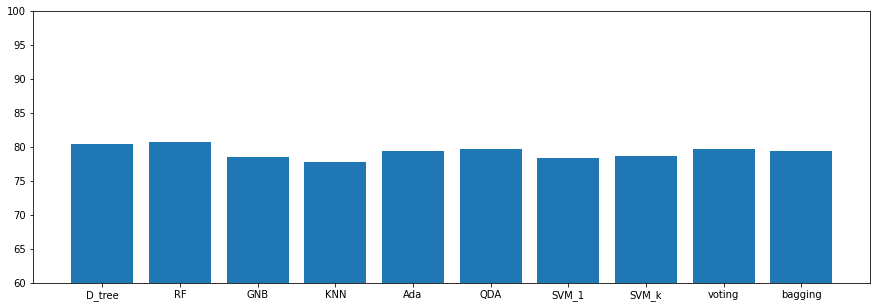

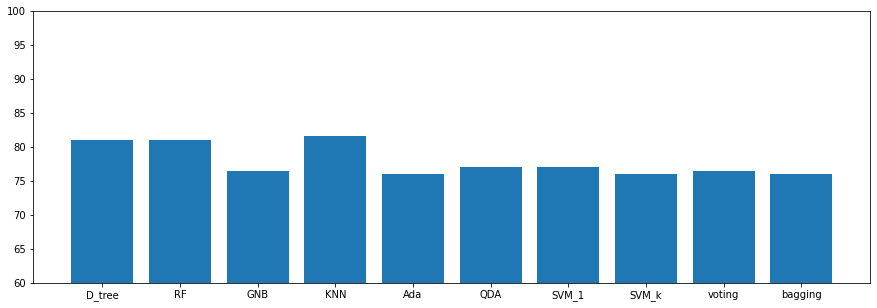

In [30]:
# Age가 null값인 경우 모델 테스트
modelaccuracies = []
modelmeans = []
modelnames = []
y_pred = []

classifier_data = zip(classifier_names,classifiers)
for classifier_name,classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10,shuffle=True)
  accuracies = cross_val_score(classifier, X=train_XAN,y=train_YAN,cv=skf)
  classifier.fit(train_XAN,train_YAN)
  y_pred.append(classifier.score(test_XAN,test_YAN)*100)
  print("Train",classifier_name,': {:.2f} %'.format(accuracies.mean()*100))
  print("Test",classifier_name,': {:.2f} %'.format(classifier.score(test_XAN,test_YAN)*100))
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

plt.figure(figsize=(15,5))
plt.ylim([60,100])
plt.bar(modelnames,modelmeans)

plt.figure(figsize=(15,5))
plt.ylim([60,100])
plt.bar(modelnames,y_pred)

plt.show()

Train D_tree : 76.54 %
Test D_tree : 71.33 %
Train RF : 80.73 %
Test RF : 77.62 %
Train GNB : 77.60 %
Test GNB : 75.52 %
Train KNN : 79.86 %
Test KNN : 77.62 %
Train Ada : 77.93 %
Test Ada : 78.32 %
Train QDA : 77.07 %
Test QDA : 79.72 %
Train SVM_1 : 80.05 %
Test SVM_1 : 78.32 %
Train SVM_k : 77.24 %
Test SVM_k : 78.32 %
Train voting : 80.74 %
Test voting : 79.02 %
Train bagging : 77.94 %
Test bagging : 78.32 %


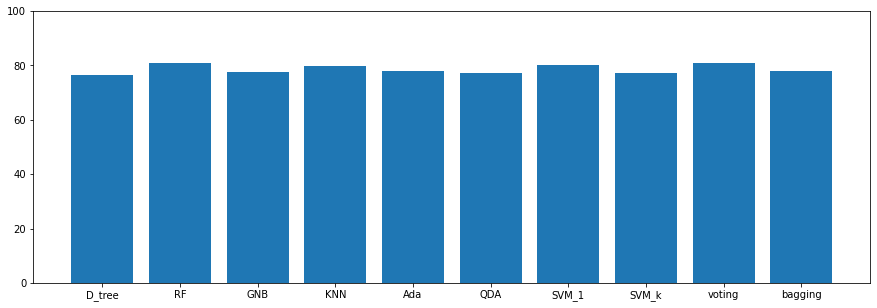

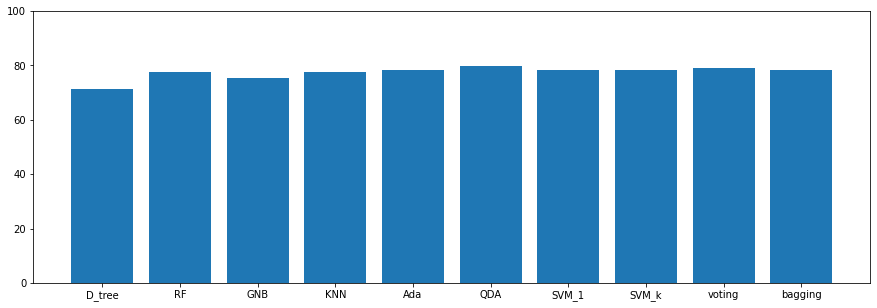

In [31]:
# Age가 null이 아닌 경우 모델 테스트
modelaccuracies = []
modelmeans = []
modelnames = []
y_pred = []
classifier_data = zip(classifier_names,classifiers)
for classifier_name,classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10,shuffle=True)
  accuracies = cross_val_score(classifier, X=train_XA,y=train_YA,cv=skf)
  classifier.fit(train_XA,train_YA)
  y_pred.append(classifier.score(test_XA,test_YA)*100)
  print("Train",classifier_name,': {:.2f} %'.format(accuracies.mean()*100))
  print("Test",classifier_name,': {:.2f} %'.format(classifier.score(test_XA,test_YA)*100))
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

plt.figure(figsize=(15,5))
plt.ylim([0,100])
plt.bar(modelnames,modelmeans)

plt.figure(figsize=(15,5))
plt.ylim([0,100])
plt.bar(modelnames,y_pred)

plt.show()

## 대부분 비슷하나 변수를 줄이기 위하여 결과가 양호한 에이다부스트,
## 랜덤포레스트, 서포트벡터머신, 가우시안나이브베이스를 이용하여 보팅을
## 활용하기로 결정

# 6. 테스트데이터 전처리

In [32]:
# Train에서 안쓴 column 삭제
test_data.drop(columns=['Name','SibSp','Ticket','Cabin'],axis=1,inplace=True)

# Embarked 숫자로 변경 {'S': 0 ,'C': 1 , 'Q' : 2 } 
test_data['Embarked'].replace({'S': 0 ,'C': 1 , 'Q' : 2 },inplace=True)

# Sex 숫자로 변경 {'male':0,'female':1}
test_data['Sex'].replace({'male': 0 ,'female': 1 },inplace=True)

# test데이터의 null값 확인
print(test_data.isnull().sum(axis=0))

PassengerId     0
Pclass          0
Sex             0
Age            86
Parch           0
Fare            1
Embarked        0
dtype: int64


In [33]:
# null값이 들어있는 Fare의 정보 확인
test_data['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

## Fare의 표준편차가 매우 크고 연속형 데이터이므로 차선책으로
## 중간값으로 채우기로 결정

In [34]:
# Fare의 null값을 중간값으로채우기
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)

In [35]:
# Train데이터와 똑같이 스케일링하기
tf=test_data.loc[:,['Fare','Age']]

ta = pd.DataFrame(ss.transform(tf),columns=tf.columns)
sc_test_data=test_data.copy()
sc_test_data['Fare']=ta.loc[:,'Fare']
sc_test_data['Age']=ta.loc[:,'Age']

In [36]:
# Age가 null인 행과 아닌 행 분리
tX_AN=sc_test_data.loc[(sc_test_data['Age'].isnull())]
tX_AN.drop(columns='Age',axis=1,inplace=True)
tX_A=sc_test_data.loc[(sc_test_data['Age']>-100)]

# 알고리즘에 넣기 위하여 인덱스 재설정
tX_A.reset_index(drop=True,inplace=True)
tX_AN.reset_index(drop=True,inplace=True)

C:\Users\hongj\AppData\Local\Temp\ipykernel_3220\2747202285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tX_AN.drop(columns='Age',axis=1,inplace=True)


In [37]:
# 알고리즘 준비
v1 = VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                                  ('2',RandomForestClassifier()),
                                  ('3',SVC(kernel='linear')),
                                 ('4',GaussianNB())])
# 알고리즘 학습
v1.fit(train_XAN,train_YAN)

# 영향이 없는 PassengerId값을 제외하고 예측하여 tX_AN에 저장
# y_pred1 = v1.predict(tX_AN.loc[:,['Pclass','Sex','Parch','Fare','Embarked']])
y_pred1 = v1.predict(tX_AN.loc[:,['Pclass','Sex','Fare','Embarked']])
tX_AN['Survived']=y_pred1

C:\Users\hongj\AppData\Local\Temp\ipykernel_3220\2075351481.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tX_AN['Survived']=y_pred1


In [38]:
# 알고리즘 준비
v2 = VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                                  ('2',RandomForestClassifier()),
                                  ('3',SVC(kernel='linear')),
                                 ('4',GaussianNB())])
# 알고리즘 학습
v2.fit(train_XA,train_YA)

# 영향이 없는 PassengerId값을 제외하고 예측하여 tX_A에 저장
# y_pred2 = v2.predict(tX_A.loc[:,['Pclass','Sex','Age','Parch','Fare','Embarked']])
y_pred2 = v2.predict(tX_A.loc[:,['Pclass','Sex','Age','Fare','Embarked']])
tX_A['Survived']=y_pred2


C:\Users\hongj\AppData\Local\Temp\ipykernel_3220\2558154833.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tX_A['Survived']=y_pred2


# 7. 결과 제출 준비

In [39]:
# 제출형식에 맞도록 PassengerId와 Survived만 따로 분리하여 저장
re1 = tX_AN.loc[:,['PassengerId','Survived']]
re2 = tX_A.loc[:,['PassengerId','Survived']]

# 2가지 데이터프레임 합치기
result = pd.concat([re1,re2])

# 순서를 맞추기 위하여 PassengerId기준으로 정렬 후 PassengerId로 인덱스 설정
result.sort_values('PassengerId',inplace=True)
result.set_index('PassengerId',inplace=True)

# 제출용 csv파일로 저장
result.to_csv('./result.csv')